# Weather Prediction

#### First we will try predicting the weather condition using the Random Forest model.

Importing the necessary libraries.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Importing the dataset and reading it

In [24]:
weather_df = pd.read_csv("WeatherSL.csv")
weather_df

,Date,Month,Year,RF,T_max,T_min,Avg_tem
0,1,10,2013,0.0,31.1,25.8,28.45
1,2,10,2013,0.0,31.3,27.5,29.40
2,3,10,2013,1.6,31.3,27.3,29.30
3,4,10,2013,5.8,30.7,25.7,28.20
4,5,10,2013,0.3,30.8,24.4,27.60
...,...,...,...,...,...,...,...
3647,26,9,2023,18.4,31.3,26.4,28.85
3648,27,9,2023,42.4,29.8,25.2,27.50
3649,28,9,2023,63.4,28.7,24.6,26.65
3650,29,9,2023,60.3,29.8,23.8,26.80


Analysing the data type of each column in the dataset.

In [25]:
weather_df.dtypes

Date         int64
Month        int64
Year         int64
RF         float64
T_max      float64
T_min      float64
Avg_tem    float64
dtype: object

The dataset is checked for null values.

In [26]:
weather_df.isnull().sum()

Date       0
Month      0
Year       0
RF         0
T_max      0
T_min      0
Avg_tem    0
dtype: int64

Since there are no null values in the dataset, we do not need to handle that. 

Two separate lists are initialized to store the rainfall and the average temperature values.

In [27]:
average_temp = weather_df["Avg_tem"]
average_temp

0       28.45
1       29.40
2       29.30
3       28.20
4       27.60
        ...  
3647    28.85
3648    27.50
3649    26.65
3650    26.80
3651    26.95
Name: Avg_tem, Length: 3652, dtype: float64

In [28]:
rainfall = weather_df['RF']
rainfall

0        0.0
1        0.0
2        1.6
3        5.8
4        0.3
        ... 
3647    18.4
3648    42.4
3649    63.4
3650    60.3
3651    29.6
Name: RF, Length: 3652, dtype: float64

Now categorical values are created to define the weather conditions using nested if conditions.

In [31]:
weather_condition = []

for temp, rain in zip(average_temp, rainfall):
    if temp >= 27 and temp <= 29:
        if rain >= 6.5 and  rain <= 8.5:
            weather_condition.append("Normal Normal")
        elif rain > 8.5:
            weather_condition.append("Normal Wet")
        elif rain < 6.5:
            weather_condition.append("Normal Dry")
    elif temp < 27:
        if rain >= 6.5 and  rain <= 8.5:
            weather_condition.append("Cold Normal")
        elif rain > 8.5:
            weather_condition.append("Cold Wet")
        elif rain < 6.5:
            weather_condition.append("Cold Dry")
    elif temp > 29:
        if rain >= 6.5 and  rain <= 8.5:
            weather_condition.append("Warm Normal")
        elif rain > 8.5:
            weather_condition.append("Warm Wet")
        elif rain < 6.5:
            weather_condition.append("Warm Dry")

print(f"Length of the weather list is {len(weather_condition)}")


Length of the weather list is 3652


A custom column called weather condition is created based on the nested if created above and the respective condition is assigned for each row.

In [32]:
weather_df["Weather_condition"] = weather_condition
weather_df.head()

,Date,Month,Year,RF,T_max,T_min,Avg_tem,Weather_condition
0,1,10,2013,0.0,31.1,25.8,28.45,Normal Dry
1,2,10,2013,0.0,31.3,27.5,29.40,Warm Dry
2,3,10,2013,1.6,31.3,27.3,29.30,Warm Dry
3,4,10,2013,5.8,30.7,25.7,28.20,Normal Dry
4,5,10,2013,0.3,30.8,24.4,27.60,Normal Dry


The entries for each weather condition is displayed for further analysis.

In [33]:
print('Number of Normal Normal Weather: ',weather_df[['Weather_condition']].query("Weather_condition == 'Normal Normal'").count())
print('Number of Normal Wet Weather: ',weather_df[['Weather_condition']].query("Weather_condition == 'Normal Wet'").count())
print('Number of Normal Dry Weahter: ',weather_df[['Weather_condition']].query("Weather_condition == 'Normal Dry'").count())

print('Number of Cold Normal Weather: ',weather_df[['Weather_condition']].query("Weather_condition == 'Cold Normal'").count())
print('Number of Cold Wet Weather: ',weather_df[['Weather_condition']].query("Weather_condition == 'Cold Wet'").count())
print('Number of Cold Dry Weahter: ',weather_df[['Weather_condition']].query("Weather_condition == 'Cold Dry'").count())

print('Number of Warm Normal Weather: ',weather_df[['Weather_condition']].query("Weather_condition == 'Warm Normal'").count())
print('Number of Warm Wet Weather: ',weather_df[['Weather_condition']].query("Weather_condition == 'Warm Wet'").count())
print('Number of Warm Dry Weahter: ',weather_df[['Weather_condition']].query("Weather_condition == 'Warm Dry'").count())

Number of Normal Normal Weather:  Weather_condition    83
dtype: int64
Number of Normal Wet Weather:  Weather_condition    497
dtype: int64
Number of Normal Dry Weahter:  Weather_condition    1837
dtype: int64
Number of Cold Normal Weather:  Weather_condition    14
dtype: int64
Number of Cold Wet Weather:  Weather_condition    132
dtype: int64
Number of Cold Dry Weahter:  Weather_condition    236
dtype: int64
Number of Warm Normal Weather:  Weather_condition    22
dtype: int64
Number of Warm Wet Weather:  Weather_condition    99
dtype: int64
Number of Warm Dry Weahter:  Weather_condition    732
dtype: int64


Making a list of all the features in the dataset.

In [34]:
dataset_features = weather_df.columns
dataset_features = [i for i in dataset_features if i != "Weather_condition"]
dataset_features
classes = ['Normal Normal', 'Normal Wet', 'Normal Dry', 'Cold Normal', 'Cold Wet', 'Cold Dry', 'Warm Normal', 'Warm Wet', 'Warm Dry']

In [35]:
dataset_features

['Date', 'Month', 'Year', 'RF', 'T_max ', 'T_min', 'Avg_tem']

The data has to be split into Training and Testing components.

In [36]:
training, testing = train_test_split(weather_df, test_size=0.2, random_state=42)
print(f"Number of total entries is {len(weather_df)}")
print(f"Entries in the training dataset is {len(training)}")
print(f"Entries in the testing dataset is {len(testing)}")

Number of total entries is 3652
Entries in the training dataset is 2921
Entries in the testing dataset is 731


Splitting into x and y components.

In [37]:
x_train = training[dataset_features]
y_train = training["Weather_condition"]

x_test = testing[dataset_features]
y_test = testing["Weather_condition"]

Creating the Random Forest Classifier Model

In [38]:
model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf= 20, random_state=42)

# the model is trained using the training component of the dataset
model.fit(x_train, y_train)

# the model is tested using the testing component of the dataset
y_prediction = model.predict(x_test)


Calculating a few metrics to analyse the performance of the model.

Accuracy of the model is: 0.9863201094391245
               precision    recall  f1-score   support

     Cold Dry       1.00      1.00      1.00        58
  Cold Normal       0.00      0.00      0.00         3
     Cold Wet       0.88      0.96      0.92        24
   Normal Dry       1.00      1.00      1.00       358
Normal Normal       1.00      0.76      0.87        17
   Normal Wet       0.95      1.00      0.98       103
     Warm Dry       1.00      1.00      1.00       146
  Warm Normal       0.00      0.00      0.00         2
     Warm Wet       0.91      1.00      0.95        20

     accuracy                           0.99       731
    macro avg       0.75      0.75      0.75       731
 weighted avg       0.98      0.99      0.98       731



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


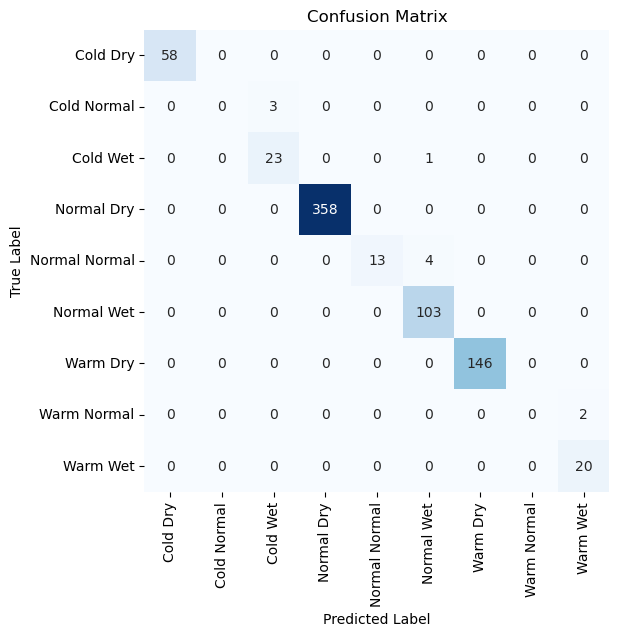

In [39]:
accuracy  = accuracy_score(y_test, y_prediction)
print(f"Accuracy of the model is: {accuracy}")

print(classification_report(y_test, y_prediction))

conf_matrix = confusion_matrix(y_test, y_prediction)

# plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The model has an accuracy of 98.63%

A learning curve is created for the model.

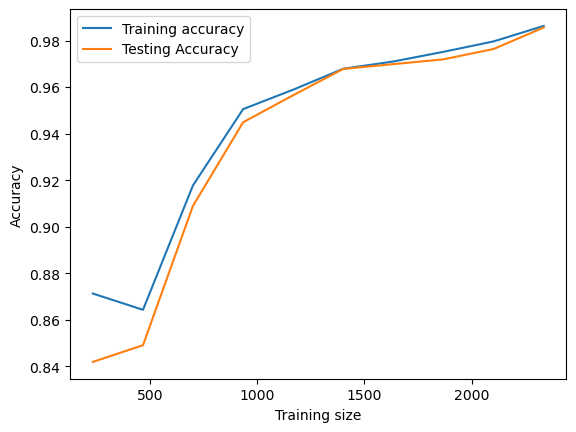

In [40]:
train_size, train_score, test_score = learning_curve(model, x_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1,1.0,10))
training_mean = np.mean(train_score, axis=1)
testing_mean = np.mean(test_score, axis=1)

plt.plot(train_size, training_mean, label="Training accuracy")
plt.plot(train_size, testing_mean, label="Testing Accuracy")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()